# Tasks 



In [1]:
# Imports
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Source the Data Set


In [2]:
# import the Iris data set from the sklearn.datasets module.
from sklearn.datasets import load_iris

# load the iris dataset
data = skl.datasets.load_iris()


#### 'Explain, in your own words, what the `load_iris()` function returns.'

The Iris data set is a famous data set used widely relating to statistics and machine learning. The data set collects a number of samples from different species of irises and their measurements between four distinct features: sepal width, sepal length, petal length and petal width. I sourced most of my information about this data set in a paper published by [**UC Irving**](https://archive.ics.uci.edu/dataset/53/iris).

The `load_iris` function from `sklearn.datasets` module returns a Bunch object, which is similar to a dictionary. It contains:

* a `.data` array with feature measurements.
* a `.target` array with numerical labels for the species.
* a `.feature_names` list with the names of the species.
* other metadata useful to understanding the data set.

This function loads the Iris dataset into memory.



### Task 2: Explore the Data Structure

#### 'Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.'

In [3]:
# print the shape of the data
print("Shape of dataset:", data['data'].shape)

Shape of dataset: (150, 4)


The output `(150, 4) tells us that there are 150 flower samples, which each have 4 features: sepal width, sepal length, petal length and petal width. This is the same as the UCI data set, which includes 50 samples from each of three species.

In [4]:
# create dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

# add target column
df['target'] = data.target

# display the first 5 rows of the data set
print("First 5 rows of the data set:")
print(df.head())

# display last 5 rows of the data set
print("\nLast 5 rows of the data set:")
print(df.tail())


First 5 rows of the data set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Last 5 rows of the data set:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4          

Displaying the first and last 5 rows allows me to inspect the structure and stored values in the data set. The `target` column uses integers to represent the iris species.

In [5]:
# show feature names
print("Feature names:", data.feature_names)

# show target class names
print("Target class names:", data.target_names)

# show dictionary keys
print("Keys in the data set:", data.keys())

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target class names: ['setosa' 'versicolor' 'virginica']
Keys in the data set: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


**Feature names:** are the four measurements of each iris sample

**Target class names:** the actual names of the iris species

**Keys:** The keys within the data set that help me understand it.

### Task 3: Summarize the Data

For each feature in the dataset, calculate and display:

- mean
- minimum
- maximum
- standard deviation
- median


In [6]:
# display the mean for each feature
print("Mean values:\n", df.iloc[:,:-1].mean())

# display the minimum for each feature
print("\nMinimum values:\n", df.iloc[:,:-1].min())

# display the maximum for each feature
print("\nMaximum values:\n", df.iloc[:,:-1].max())

# display the standard deviation of each feature
print("\nStandard Deviation values:\n", df.iloc[:,:-1].std())

# display the median of each feature
print("\nMedian values:\n", df.iloc[:,:-1].median())

# learned to use loc and iloc with the free DataCamp subscription provided by the course - useful for indexing

Mean values:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Minimum values:
 sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

Maximum values:
 sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

Standard Deviation values:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

Median values:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


Above are the displayed mean, minimum, maximum, standard deviation and median of the dataset. Each of these give me a further insight into the information of the dataset, now translated from raw data to something readable.


**Mean:** The mean is useful to know the averages of each feature, so that it can give context to the minimum and maximum.


**Minimum and Maximum:** These values give the range of the dataset, showing how low or high the feature's values actually are. It is useful to know to mean before observing this, as we can see that the maximum value of the sepal length is 2.1 centimetres taller than the average.


**Standard variation:** The standard variation measures the variation between the average/mean. A lower standard variation, like the sepal width, will show that the values are close to the mean would visually look close together on a graph or chart, whereas a higher standard variation will have greater space between each value.


**Median:** The median is concerned with finding the most central point of each feature and displaying it. The median can give us a better understanding of what the middle-point of the data is, as calculating the mean can be skewed with with extreme or outlying data.


### Task 4: Visualize Features

Plot histograms for each feature using `matplotlib`.

Add appropriate titles and axis labels.

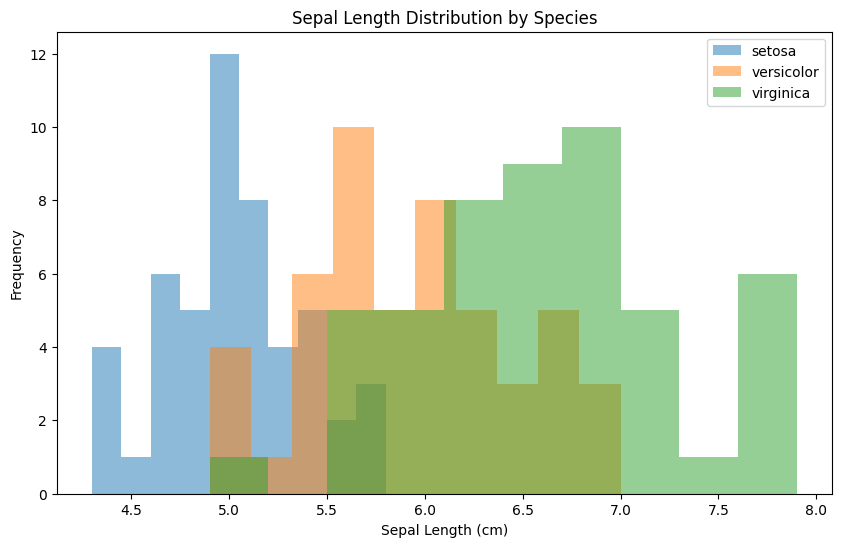

In [7]:
# load data
data = load_iris()
x = data.data # features
y = data.target # species

feature_names = data.feature_names
target_names = data.target_names

# create histogram
plt.figure(figsize=(10, 6))
for species in range(3):
    plt.hist(x[y == species, 0], bins = 10, alpha = 0.5, label= target_names[species])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Sepal Length Distribution by Species')
plt.legend()
plt.show()


### Task 5: Investigate Relationships

Choose any two features from the data set and create a scatter plot of them.

Color-code the three different classes of the scatter plot points.

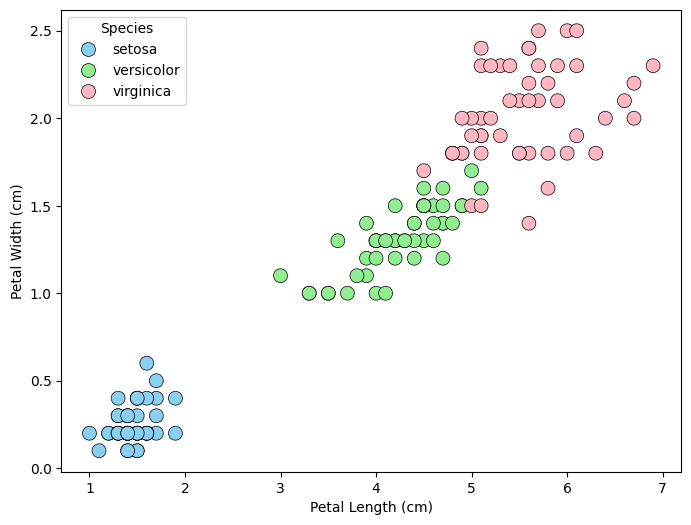

In [ ]:
# Load the data
iris_df = sns.load_dataset('iris')

plt.figure(figsize=(8,6))
sns.scatterplot(data=iris_df,
                x='petal_length',  # Changed from 'petal length (cm)'
                y='petal_width',   # Changed from 'petal width (cm)'
                hue='species',
                palette={'setosa': '#89CFF0', 'versicolor': '#90EE90', 'virginica': '#FFB6C1'},
                s=100,
                edgecolor='black',
                linewidth=0.5
)

plt.xlabel('Petal Length (cm)', fontsize=10)
plt.ylabel('Petal Width (cm)', fontsize=10)
plt.legend(title='Species')
plt.show()

# code wasn't working, used DeepSeek to figure it out
    # DeepSeek doesn't support sharing conversations but I use it as I find it to be significantly more reliable
    # for coding over ChatGPT
    # prompt was 'what's wrong with my code'

COME BACK TO CLEAN UP

**Visualisation:**

Created a colour-coded plot

Clear seperation

First visual observation seems positive.


### Task 6: Analyze Relationship

Use `numpy.polyfit` to add a regression line to the scatter plot from Task 5.

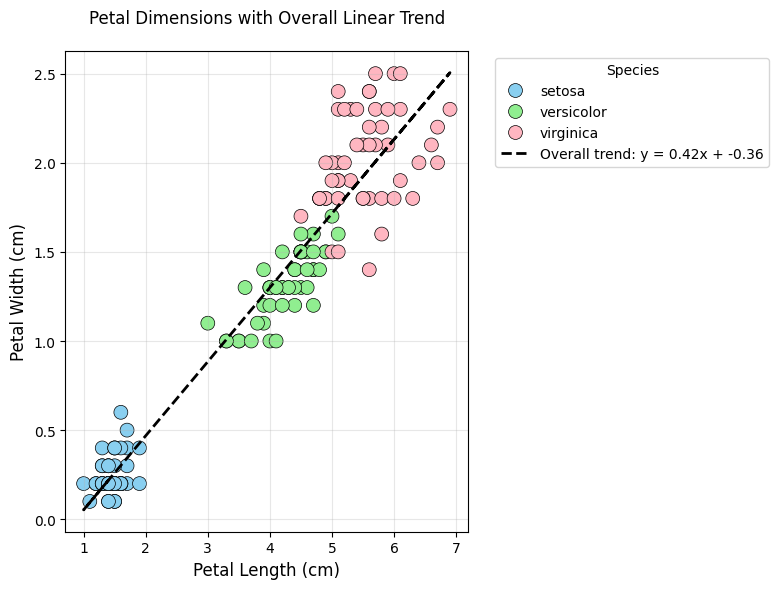

In [14]:
# load
iris_df = sns.load_dataset('iris')

# plot


plt.figure(figsize=(8,6))

# plot
scatter_plot = sns.scatterplot(data=iris_df,
                x='petal_length',  # Changed from 'petal length (cm)'
                y='petal_width',   # Changed from 'petal width (cm)'
                hue='species',
                palette={'setosa': '#89CFF0', 'versicolor': '#90EE90', 'virginica': '#FFB6C1'},
                s=100,
                edgecolor='black',
                linewidth=0.5
)

# show regression
slope, intercept = np.polyfit(iris_df['petal_length'], iris_df['petal_width'], 1)
regression_line = slope * iris_df['petal_length'] + intercept

plt.plot(iris_df['petal_length'], regression_line, 
         color='black', 
         linewidth=2, 
         linestyle='--', 
         label=f'Overall trend: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('Petal Dimensions with Overall Linear Trend', pad=20)
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


plotted petal length (y) against petal width (x)
used polyft to add regression
virginica have largest petal dimensions
setosa distinctly separate from rest

add statistical insight - possibly code?

### Task 7: Analyze Class Distributions

Create box-plots of the petal lengths for each of the three classes.

### Task 8: Compute Correlations

Calculate the correlation coefficients between the features.

Display the results as a heatmap using `matplotlib`.

### Task 9: Fit a Simple Linear Regression

For your two features in Task 5, calculate the coefficient of determination $R^2$.

Re-create the plot from Task 6 and annotate it with the $R^2$ value.

### Task 10: Too Many Features

Use `seaborn` to create a `pairplot` of the data set.

Explain, in your own words, what the `pairplot` depicts.